Importing Libraries and Loading Data

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set styling for matplotlib and seaborn
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

# Load the dataset
df = pd.read_csv("C:\\Users\\Intoxicated\\Documents\\data sci\\archive (1)\\walmart.csv")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Display first few rows
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Basic statistics of numerical columns
print("\nStatistical Summary:")
display(df.describe())

Dataset Shape: (550068, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB

First 5 rows of the dataset:


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969



Missing values in each column:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Statistical Summary:


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Data Preprocessing

In [4]:
# Make a copy of the dataset to avoid modifying the original
df_clean = df.copy()

# Convert data types
df_clean['Stay_In_Current_City_Years'] = df_clean['Stay_In_Current_City_Years'].replace('4+', '4')
df_clean['Stay_In_Current_City_Years'] = df_clean['Stay_In_Current_City_Years'].astype(int)

# Convert categorical variables to the correct type
categorical_columns = ['Gender', 'Age', 'City_Category']
for col in categorical_columns:
    df_clean[col] = df_clean[col].astype('category')

# Create a new feature for analysis
df_clean['Marital_Status'] = df_clean['Marital_Status'].map({0: 'Single', 1: 'Married'})
df_clean['Gender'] = df_clean['Gender'].map({'M': 'Male', 'F': 'Female'})

# Create a purchase frequency column (how many purchases per user)
user_purchase_counts = df_clean.groupby('User_ID').size().reset_index(name='Purchase_Frequency')
df_clean = df_clean.merge(user_purchase_counts, on='User_ID', how='left')

# Create avg purchase value per user
user_avg_purchase = df_clean.groupby('User_ID')['Purchase'].mean().reset_index(name='Avg_Purchase_Value')
df_clean = df_clean.merge(user_avg_purchase, on='User_ID', how='left')

# Display preprocessed data
display(df_clean.head())

# Unique value counts for categorical variables
for col in categorical_columns + ['Marital_Status', 'Product_Category']:
    print(f"\nUnique values in {col}:")
    print(df_clean[col].value_counts())

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_Frequency,Avg_Purchase_Value
0,1000001,P00069042,Female,0-17,10,A,2,Single,3,8370,35,9545.514286
1,1000001,P00248942,Female,0-17,10,A,2,Single,1,15200,35,9545.514286
2,1000001,P00087842,Female,0-17,10,A,2,Single,12,1422,35,9545.514286
3,1000001,P00085442,Female,0-17,10,A,2,Single,12,1057,35,9545.514286
4,1000002,P00285442,Male,55+,16,C,4,Single,8,7969,77,10525.610390



Unique values in Gender:
Gender
Male      414259
Female    135809
Name: count, dtype: int64

Unique values in Age:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

Unique values in City_Category:
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

Unique values in Marital_Status:
Marital_Status
Single     324731
Married    225337
Name: count, dtype: int64

Unique values in Product_Category:
Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64


 Exploratory Data Analysis - User Demographics

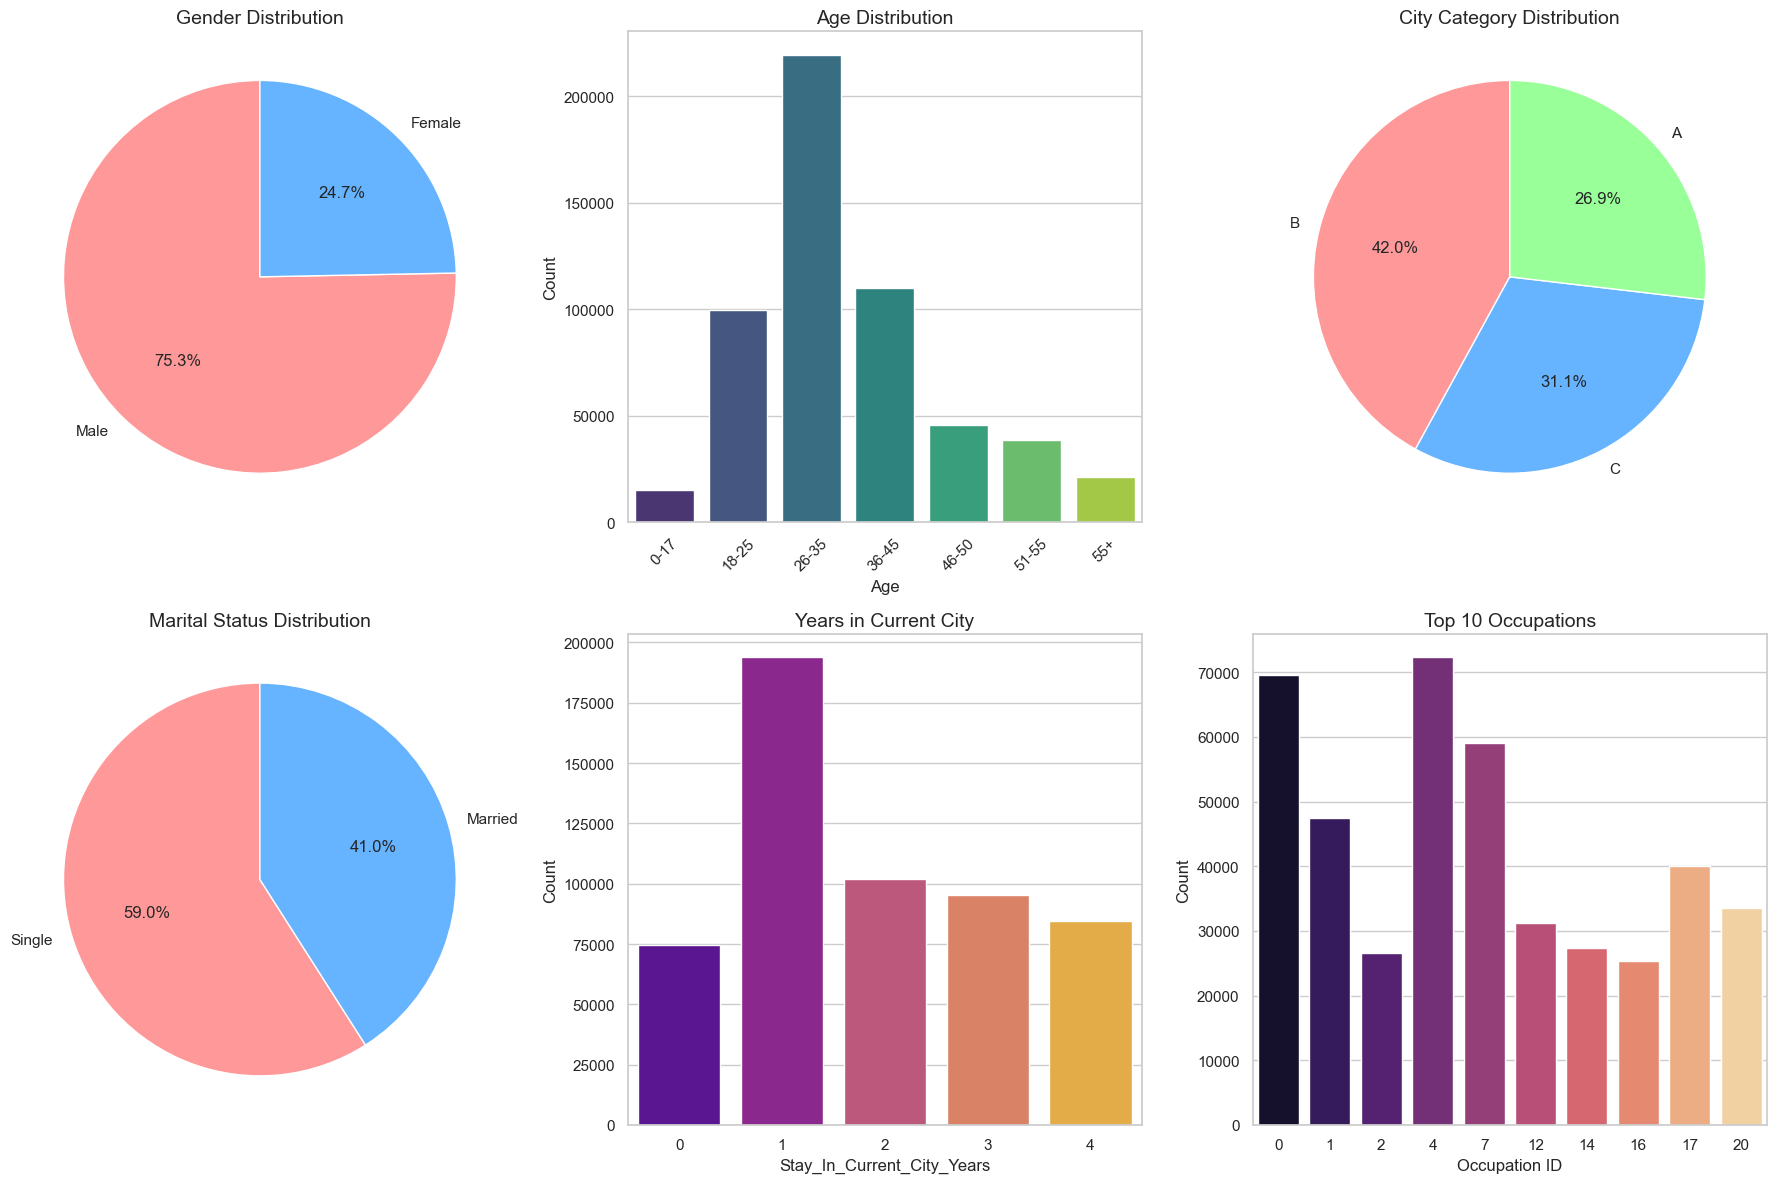

In [5]:
# Create a subplot figure for demographic analysis
fig = plt.figure(figsize=(18, 12))

# 1. Gender Distribution
plt.subplot(2, 3, 1)
gender_counts = df_clean['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution', fontsize=14)

# 2. Age Distribution
plt.subplot(2, 3, 2)
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
age_counts = df_clean['Age'].value_counts().reindex(age_order)
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.title('Age Distribution', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Count')

# 3. City Category Distribution
plt.subplot(2, 3, 3)
city_counts = df_clean['City_Category'].value_counts()
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('City Category Distribution', fontsize=14)

# 4. Marital Status Distribution
plt.subplot(2, 3, 4)
marital_counts = df_clean['Marital_Status'].value_counts()
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Marital Status Distribution', fontsize=14)

# 5. Stay In Current City Years
plt.subplot(2, 3, 5)
stay_counts = df_clean['Stay_In_Current_City_Years'].value_counts().sort_index()
sns.barplot(x=stay_counts.index, y=stay_counts.values, palette='plasma')
plt.title('Years in Current City', fontsize=14)
plt.ylabel('Count')

# 6. Occupation Distribution (Top 10)
plt.subplot(2, 3, 6)
occupation_counts = df_clean['Occupation'].value_counts().nlargest(10)
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='magma')
plt.title('Top 10 Occupations', fontsize=14)
plt.xlabel('Occupation ID')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Purchase Analysis

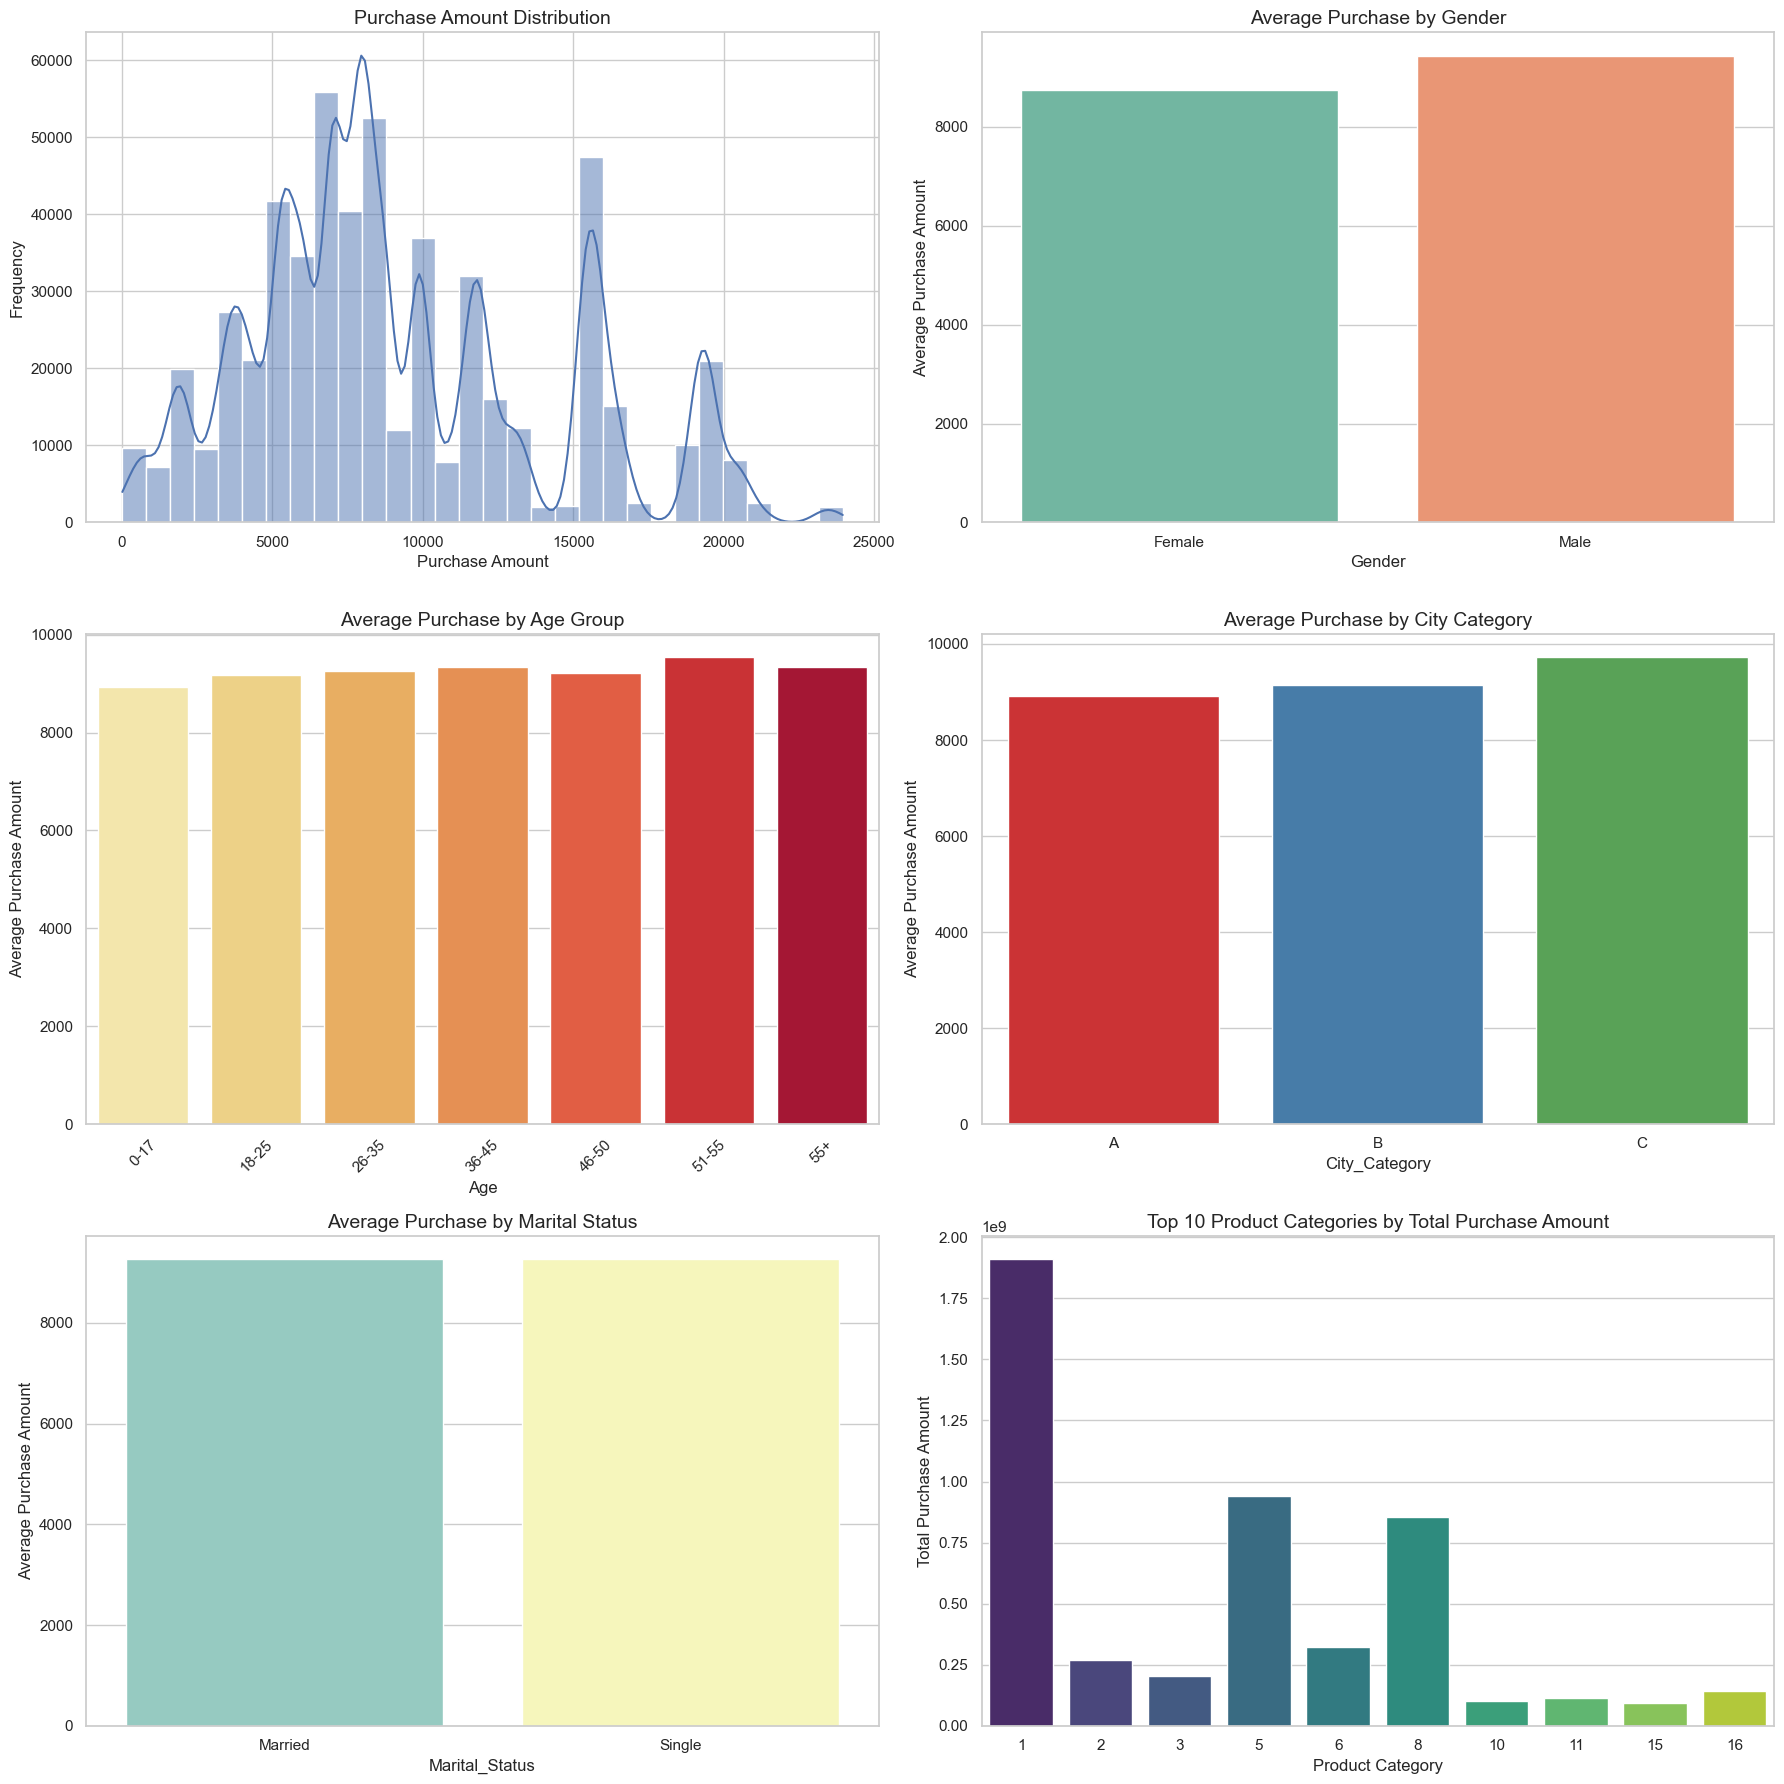

In [6]:
# Create a figure for purchase analysis
plt.figure(figsize=(18, 18))

# 1. Purchase amount distribution
plt.subplot(3, 2, 1)
sns.histplot(df_clean['Purchase'], bins=30, kde=True)
plt.title('Purchase Amount Distribution', fontsize=14)
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

# 2. Average purchase by gender
plt.subplot(3, 2, 2)
gender_purchase = df_clean.groupby('Gender')['Purchase'].mean().reset_index()
sns.barplot(x='Gender', y='Purchase', data=gender_purchase, palette='Set2')
plt.title('Average Purchase by Gender', fontsize=14)
plt.ylabel('Average Purchase Amount')

# 3. Average purchase by age
plt.subplot(3, 2, 3)
age_purchase = df_clean.groupby('Age')['Purchase'].mean().reset_index()
# Reorder age groups
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
age_purchase['Age'] = pd.Categorical(age_purchase['Age'], categories=age_order, ordered=True)
age_purchase = age_purchase.sort_values('Age')
sns.barplot(x='Age', y='Purchase', data=age_purchase, palette='YlOrRd')
plt.title('Average Purchase by Age Group', fontsize=14)
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)

# 4. Average purchase by city category
plt.subplot(3, 2, 4)
city_purchase = df_clean.groupby('City_Category')['Purchase'].mean().reset_index()
sns.barplot(x='City_Category', y='Purchase', data=city_purchase, palette='Set1')
plt.title('Average Purchase by City Category', fontsize=14)
plt.ylabel('Average Purchase Amount')

# 5. Average purchase by marital status
plt.subplot(3, 2, 5)
marital_purchase = df_clean.groupby('Marital_Status')['Purchase'].mean().reset_index()
sns.barplot(x='Marital_Status', y='Purchase', data=marital_purchase, palette='Set3')
plt.title('Average Purchase by Marital Status', fontsize=14)
plt.ylabel('Average Purchase Amount')

# 6. Top 10 product categories by total purchase amount
plt.subplot(3, 2, 6)
category_purchase = df_clean.groupby('Product_Category')['Purchase'].sum().reset_index()
category_purchase = category_purchase.sort_values('Purchase', ascending=False).head(10)
sns.barplot(x='Product_Category', y='Purchase', data=category_purchase, palette='viridis')
plt.title('Top 10 Product Categories by Total Purchase Amount', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')

plt.tight_layout()
plt.show()

User Segmentation and RFM Analysis

RFM Segmentation Results:


,User_ID,Frequency,Monetary_Sum,Monetary_Mean,F_Quartile,M_Quartile,FM_Segment,Segment_Name
0,1000001,35,334093,9545.514286,2,3,23,Promising
1,1000002,77,810472,10525.610390,3,3,33,Valuable
2,1000003,29,341635,11780.517241,2,4,24,Promising Big Spenders
3,1000004,14,206468,14747.714286,1,4,14,Rare Big Spenders
4,1000005,106,821001,7745.292453,3,1,31,Frequent Low Spenders


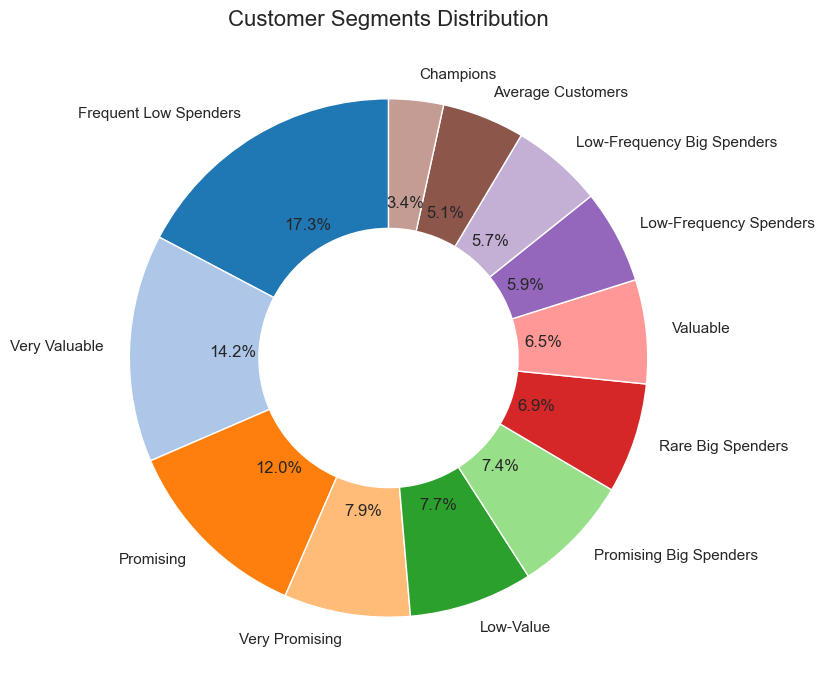

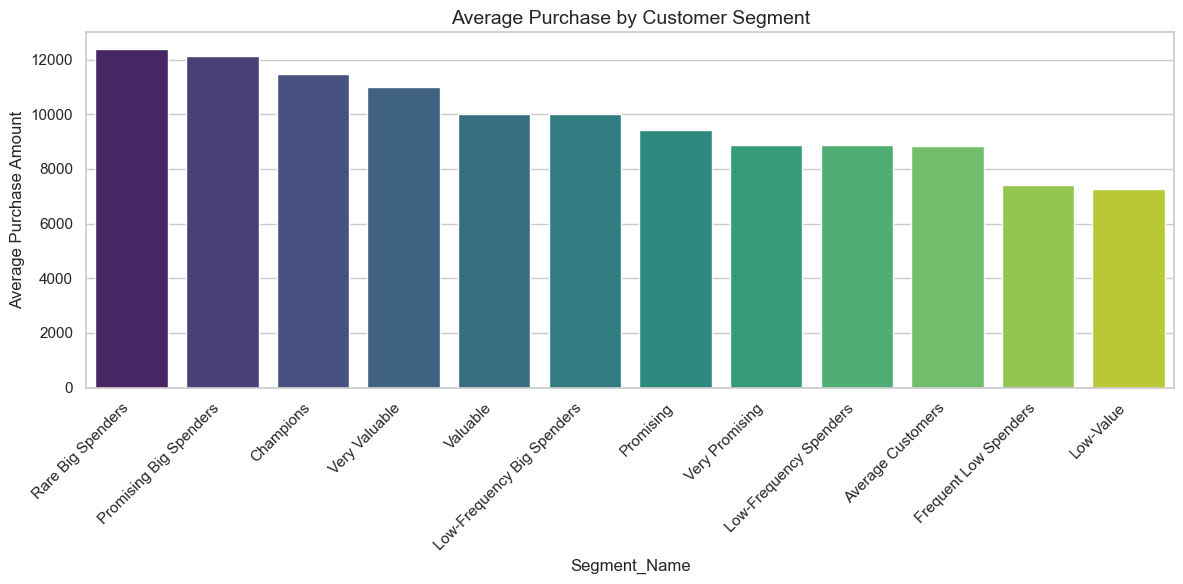

In [7]:
# RFM (Recency, Frequency, Monetary) Analysis
# Since we don't have date information, we'll focus on Frequency and Monetary aspects

# Group by User_ID
rfm = df_clean.groupby('User_ID').agg({
    'Purchase_Frequency': 'max',  # Frequency
    'Purchase': ['sum', 'mean']   # Monetary
}).reset_index()

# Flatten the multi-level columns
rfm.columns = ['User_ID', 'Frequency', 'Monetary_Sum', 'Monetary_Mean']

# Create segments based on percentiles
rfm['F_Quartile'] = pd.qcut(rfm['Frequency'], 4, labels=['1', '2', '3', '4'])
rfm['M_Quartile'] = pd.qcut(rfm['Monetary_Mean'], 4, labels=['1', '2', '3', '4'])

# Combine the segments
rfm['FM_Segment'] = rfm['F_Quartile'].astype(str) + rfm['M_Quartile'].astype(str)

# Map segments to meaningful names
segment_map = {
    '11': 'Low-Value',
    '12': 'Low-Frequency Spenders',
    '13': 'Low-Frequency Big Spenders',
    '14': 'Rare Big Spenders',
    '21': 'Frequent Low Spenders',
    '22': 'Average Customers',
    '23': 'Promising',
    '24': 'Promising Big Spenders',
    '31': 'Frequent Low Spenders',
    '32': 'Promising',
    '33': 'Valuable',
    '34': 'Very Valuable',
    '41': 'Frequent Low Spenders',
    '42': 'Very Promising',
    '43': 'Very Valuable',
    '44': 'Champions'
}

rfm['Segment_Name'] = rfm['FM_Segment'].map(segment_map)

# Display RFM segments
print("RFM Segmentation Results:")
display(rfm.head())

# Visualize the segments
plt.figure(figsize=(12, 8))
segment_counts = rfm['Segment_Name'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.5))
plt.title('Customer Segments Distribution', fontsize=16)
plt.show()

# Analyze average purchase by segment
segment_purchase = rfm.groupby('Segment_Name')['Monetary_Mean'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=segment_purchase.index, y=segment_purchase.values, palette='viridis')
plt.title('Average Purchase by Customer Segment', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Purchase Amount')
plt.tight_layout()
plt.show()

Product Category Analysis

Product Category Analysis:


,Product_Category,Purchase_Count,Total_Sales,Avg_Purchase,Unique_Customers,Market_Share
0,1,140378,1910013754,13606.218596,5767,37.482024
4,5,150933,941835229,6240.088178,5751,18.482532
7,8,113925,854318799,7498.958078,5659,16.765114
5,6,20466,324150302,15838.478550,4085,6.361111
1,2,23864,268516186,11251.935384,4296,5.269350
2,3,20213,204084713,10096.705734,3838,4.004949
15,16,9828,145120612,14766.037037,3130,2.847840
10,11,24287,113791115,4685.268456,3583,2.233032
9,10,5125,100837301,19675.570927,2328,1.978827
14,15,6290,92969042,14780.451828,2440,1.824420


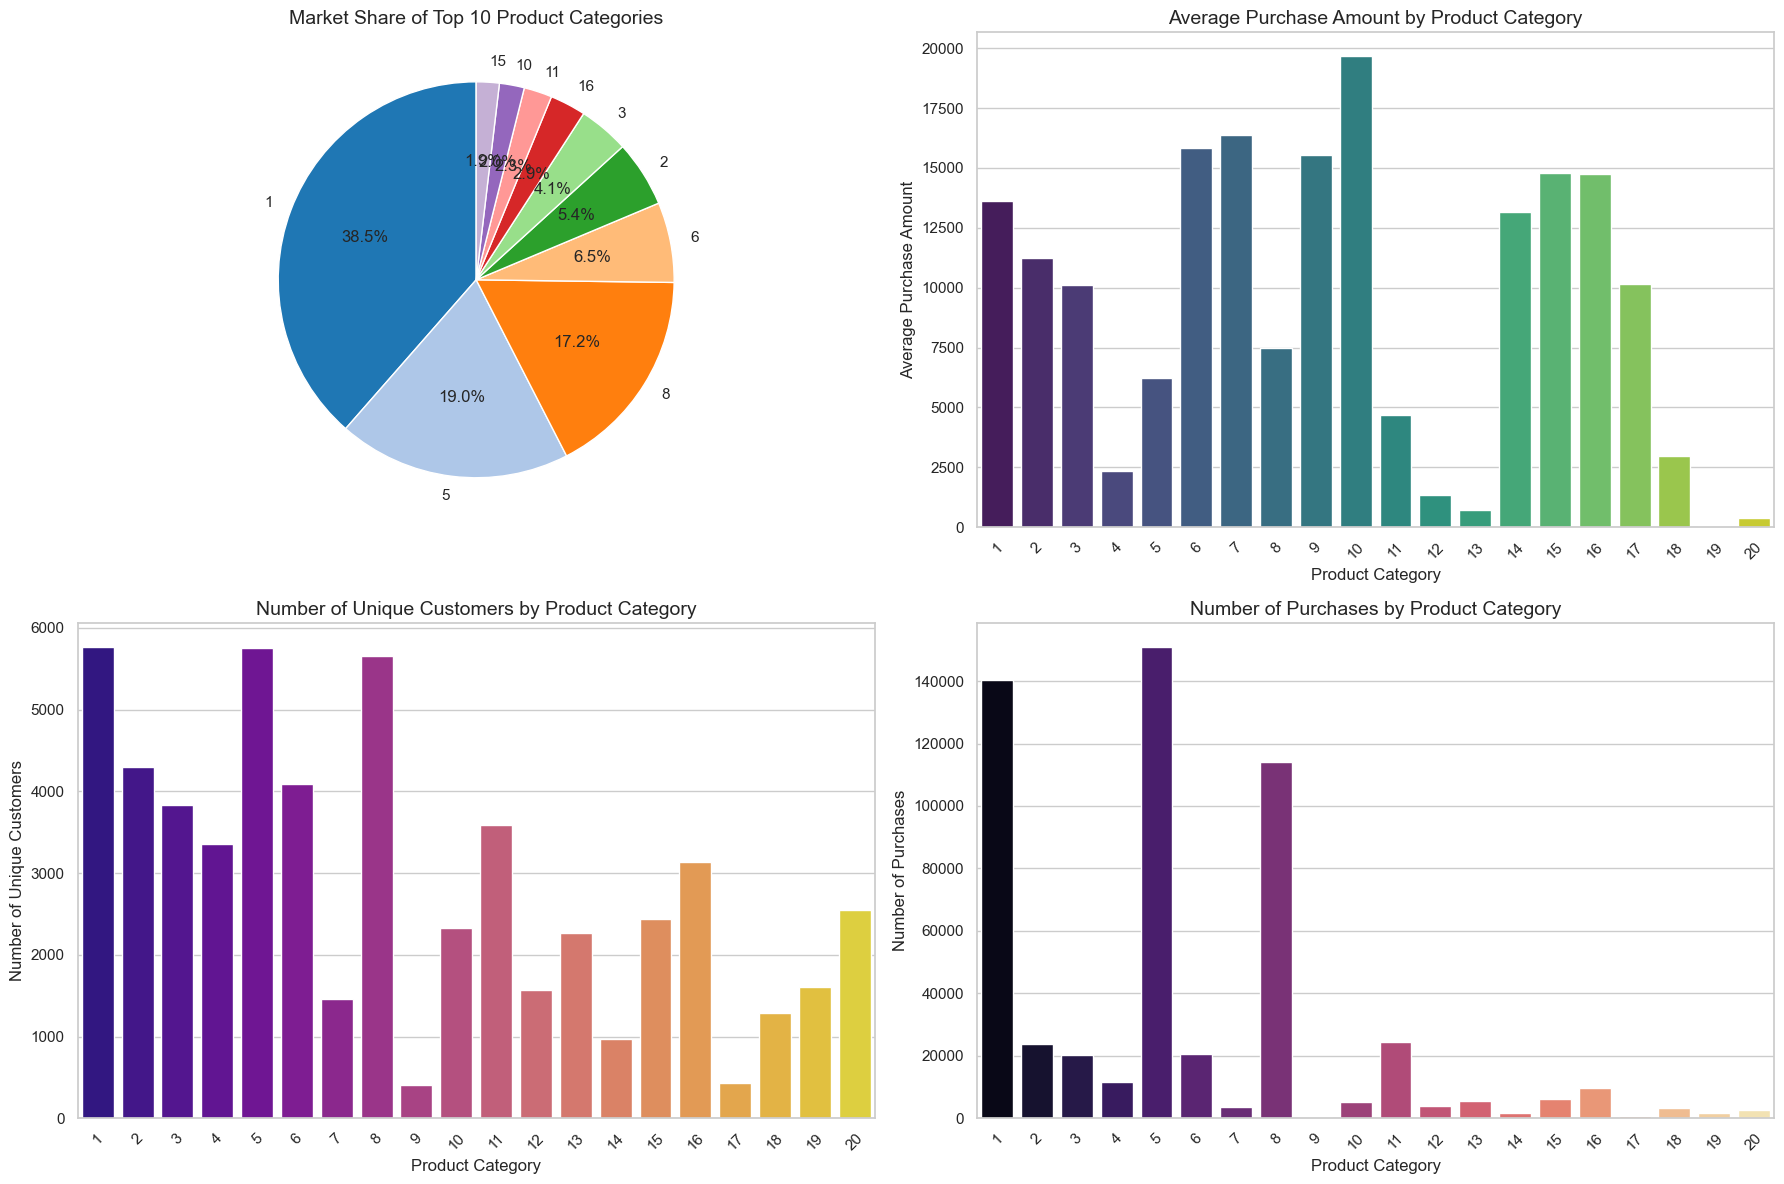

In [8]:
# Analyze product categories
category_analysis = df_clean.groupby('Product_Category').agg({
    'Purchase': ['count', 'sum', 'mean'],
    'User_ID': 'nunique'
}).reset_index()

# Flatten the multi-level columns
category_analysis.columns = ['Product_Category', 'Purchase_Count', 'Total_Sales', 'Avg_Purchase', 'Unique_Customers']

# Calculate market share
category_analysis['Market_Share'] = category_analysis['Total_Sales'] / category_analysis['Total_Sales'].sum() * 100

# Display category analysis
print("Product Category Analysis:")
display(category_analysis.sort_values('Total_Sales', ascending=False))

# Create visualizations for product categories
plt.figure(figsize=(18, 12))

# 1. Market share by product category (pie chart)
plt.subplot(2, 2, 1)
top_categories = category_analysis.sort_values('Market_Share', ascending=False).head(10)
plt.pie(top_categories['Market_Share'], labels=top_categories['Product_Category'], 
        autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Market Share of Top 10 Product Categories', fontsize=14)

# 2. Average purchase amount by product category
plt.subplot(2, 2, 2)
category_analysis_sorted = category_analysis.sort_values('Avg_Purchase', ascending=False)
sns.barplot(x='Product_Category', y='Avg_Purchase', data=category_analysis_sorted, palette='viridis')
plt.title('Average Purchase Amount by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)

# 3. Number of unique customers by product category
plt.subplot(2, 2, 3)
category_analysis_sorted = category_analysis.sort_values('Unique_Customers', ascending=False)
sns.barplot(x='Product_Category', y='Unique_Customers', data=category_analysis_sorted, palette='plasma')
plt.title('Number of Unique Customers by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)

# 4. Purchase count by product category
plt.subplot(2, 2, 4)
category_analysis_sorted = category_analysis.sort_values('Purchase_Count', ascending=False)
sns.barplot(x='Product_Category', y='Purchase_Count', data=category_analysis_sorted, palette='magma')
plt.title('Number of Purchases by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Correlation Analysis

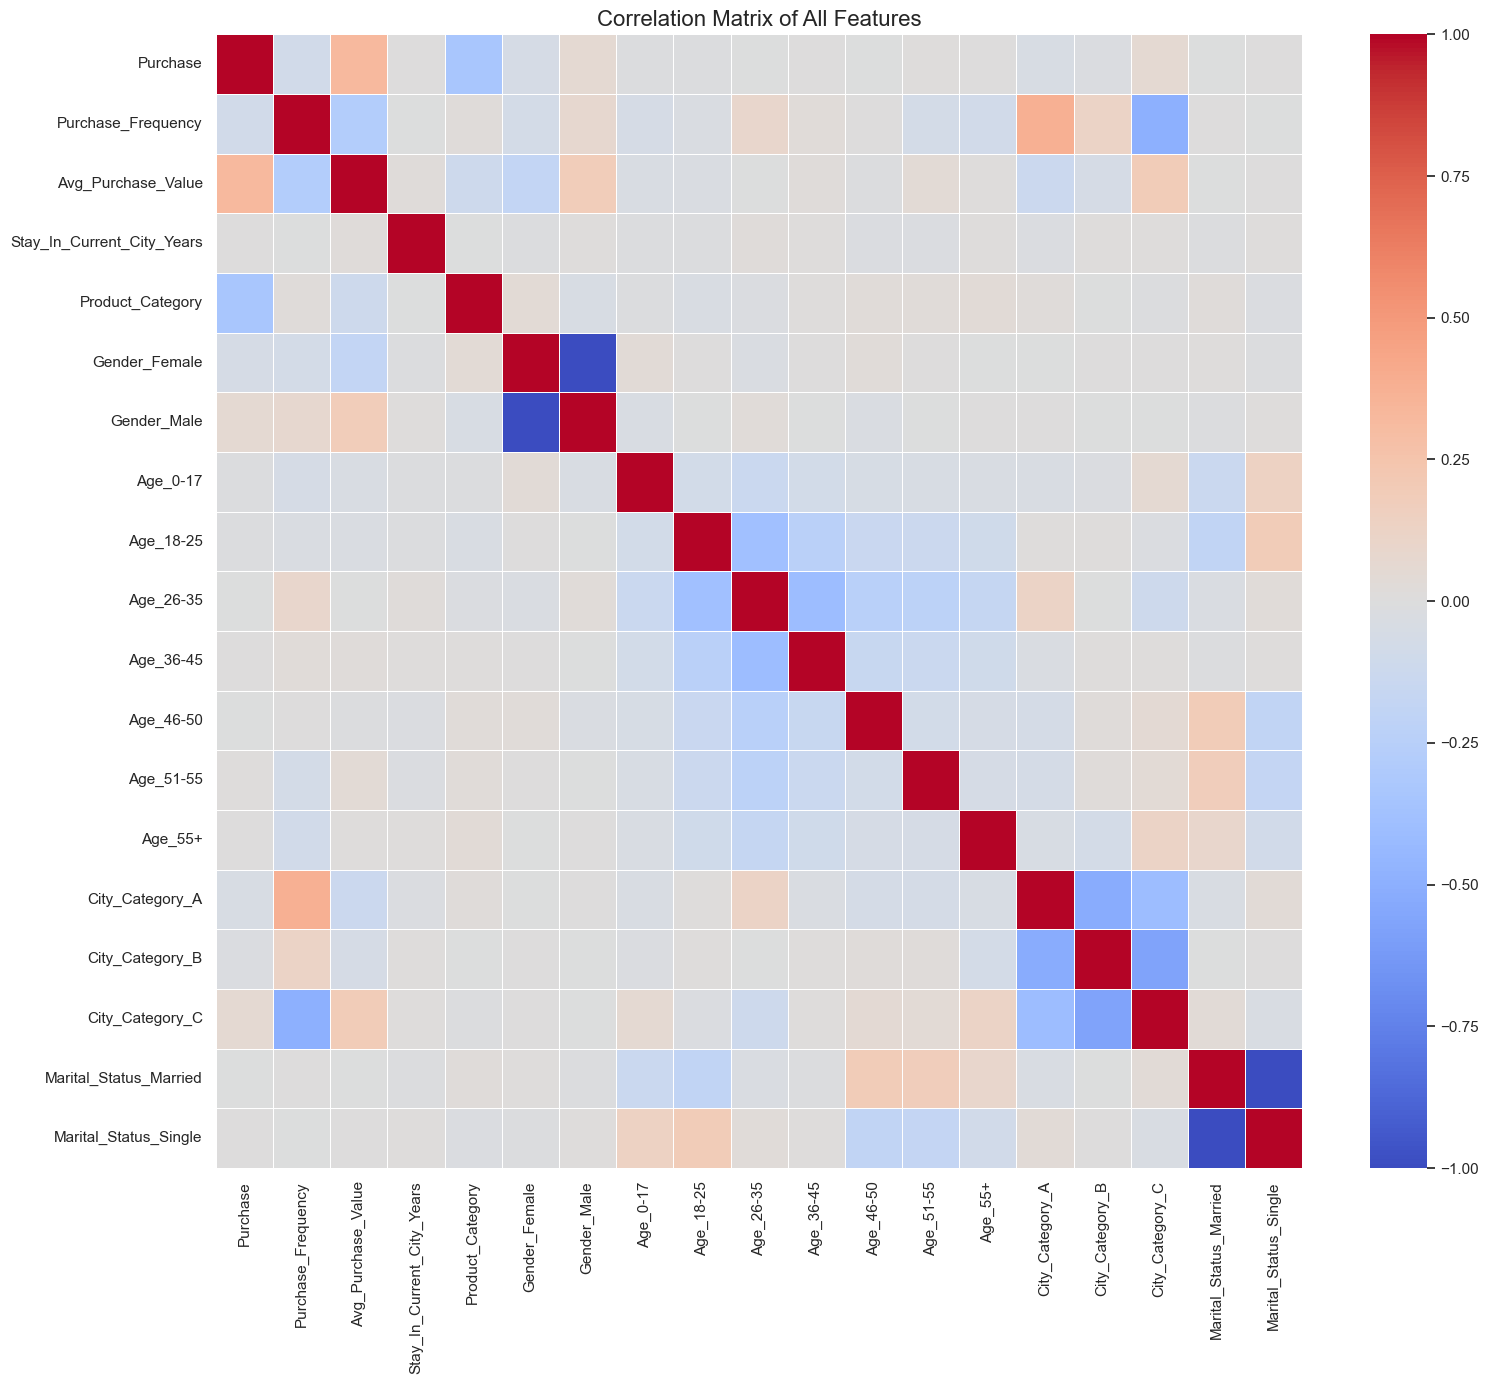

Top 10 Features Positively Correlated with Purchase Amount:


Purchase                      1.000000
Avg_Purchase_Value            0.322415
City_Category_C               0.061012
Gender_Male                   0.060346
Age_51-55                     0.014792
Age_36-45                     0.006707
Stay_In_Current_City_Years    0.005422
Age_55+                       0.002904
Marital_Status_Single         0.000463
Marital_Status_Married       -0.000463
Age_26-35                    -0.001830
Name: Purchase, dtype: float64


Top 10 Features Negatively Correlated with Purchase Amount:


Marital_Status_Married   -0.000463
Age_26-35                -0.001830
Age_46-50                -0.003317
Age_18-25                -0.008831
Age_0-17                 -0.011055
City_Category_B          -0.019098
City_Category_A          -0.042465
Gender_Female            -0.060346
Purchase_Frequency       -0.090356
Product_Category         -0.343703
Name: Purchase, dtype: float64

In [9]:
# Prepare numerical data for correlation analysis
numerical_df = df_clean[['Purchase', 'Purchase_Frequency', 'Avg_Purchase_Value']]

# Convert categorical variables to dummy variables
categorical_df = pd.get_dummies(df_clean[['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 
                                         'Marital_Status', 'Product_Category']])

# Combine numerical and categorical data
corr_df = pd.concat([numerical_df, categorical_df], axis=1)

# Compute correlation matrix
correlation = corr_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.tight_layout()
plt.show()

# Focus on correlations with Purchase amount
purchase_corr = correlation['Purchase'].sort_values(ascending=False)
print("Top 10 Features Positively Correlated with Purchase Amount:")
display(purchase_corr.head(11))  # First one is Purchase with itself (1.0)

print("\nTop 10 Features Negatively Correlated with Purchase Amount:")
display(purchase_corr.tail(10))

 Advanced Analysis - Purchase Patterns

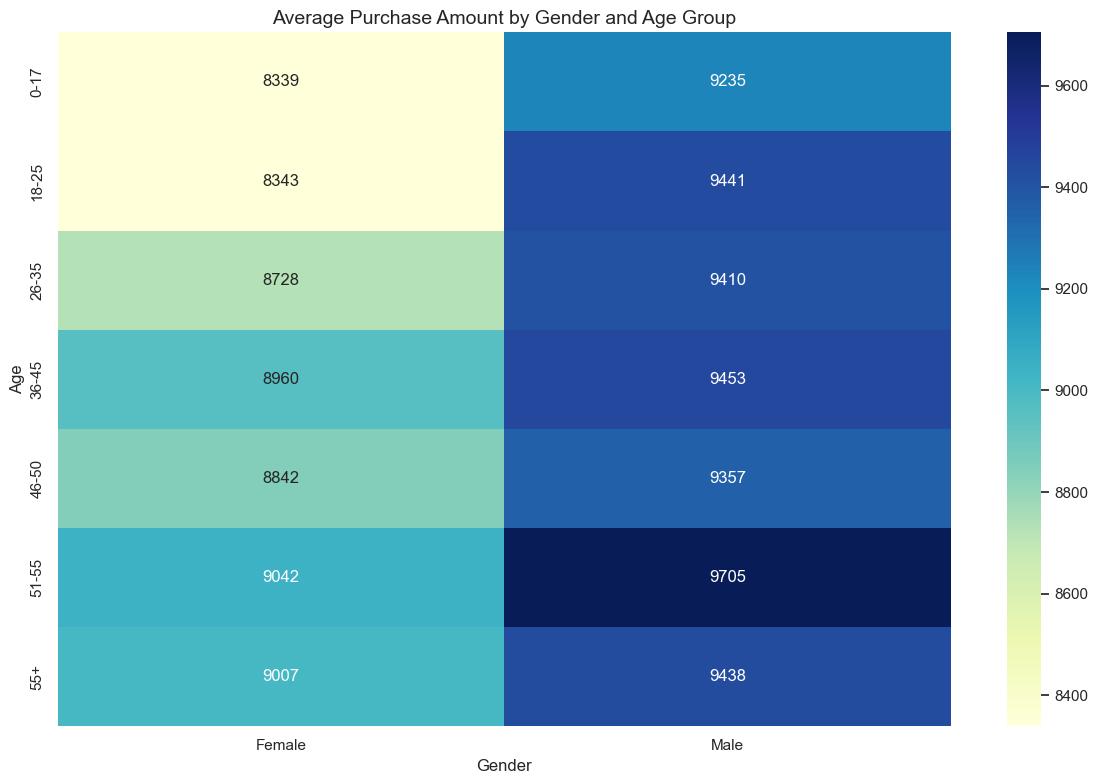

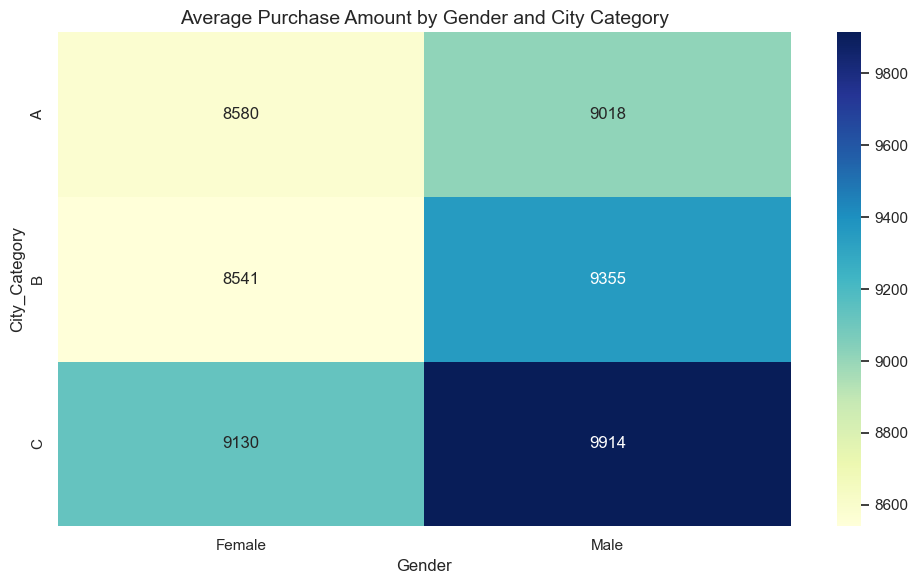

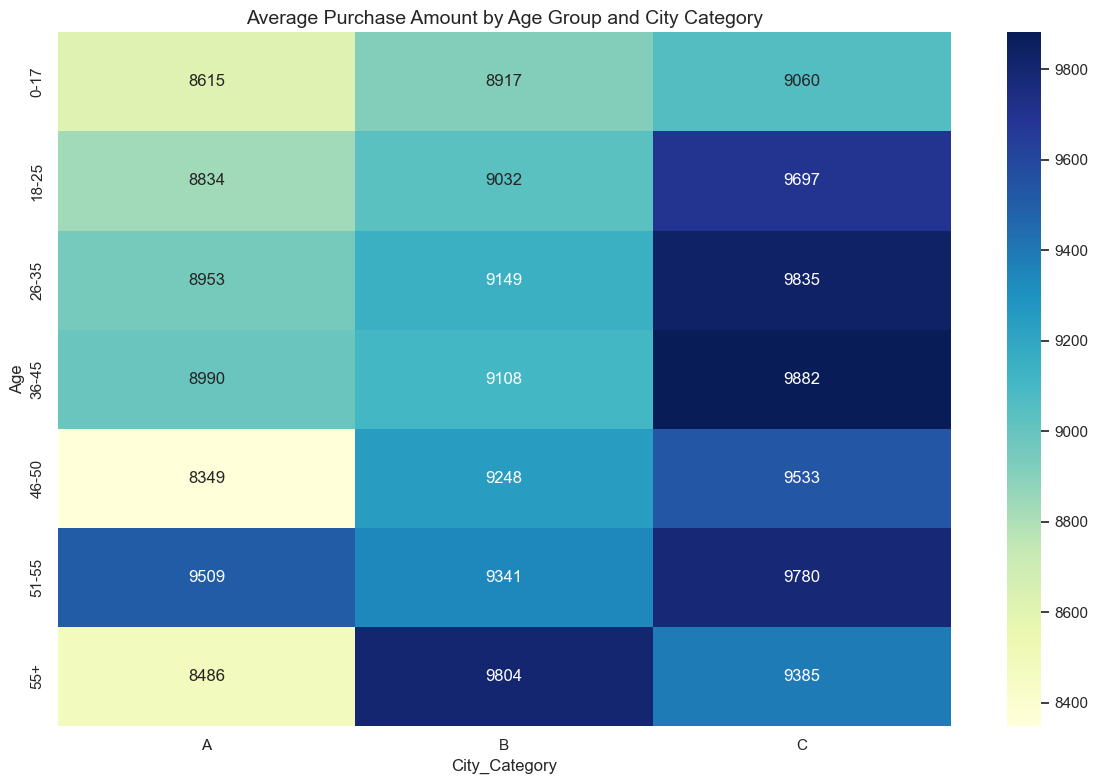

<Figure size 1400x800 with 0 Axes>

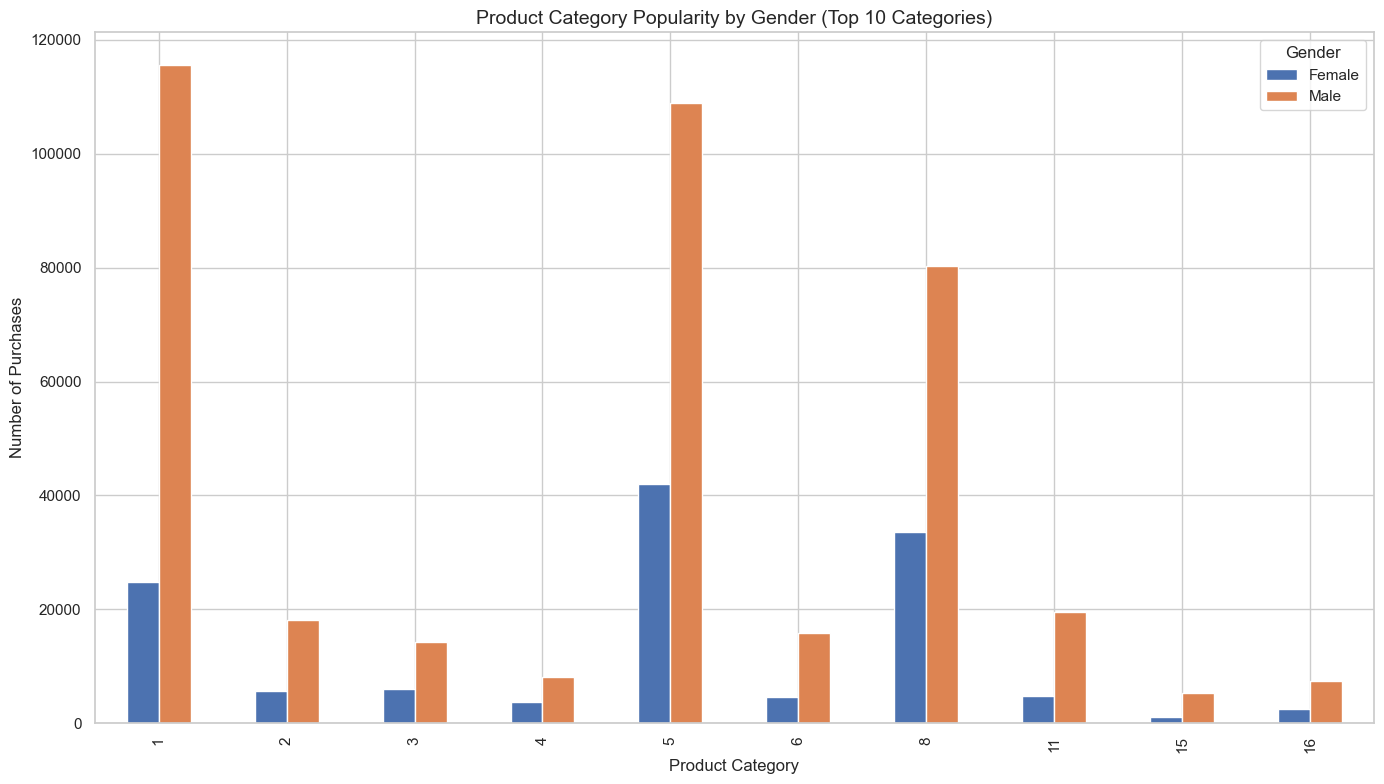

In [10]:
# Analyze purchase patterns by combinations of demographics
# Gender and Age
gender_age_purchase = df_clean.groupby(['Gender', 'Age'])['Purchase'].mean().reset_index()
gender_age_pivot = gender_age_purchase.pivot(index='Age', columns='Gender', values='Purchase')

plt.figure(figsize=(12, 8))
sns.heatmap(gender_age_pivot, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Average Purchase Amount by Gender and Age Group', fontsize=14)
plt.tight_layout()
plt.show()

# Gender and City Category
gender_city_purchase = df_clean.groupby(['Gender', 'City_Category'])['Purchase'].mean().reset_index()
gender_city_pivot = gender_city_purchase.pivot(index='City_Category', columns='Gender', values='Purchase')

plt.figure(figsize=(10, 6))
sns.heatmap(gender_city_pivot, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Average Purchase Amount by Gender and City Category', fontsize=14)
plt.tight_layout()
plt.show()

# Age and City Category
age_city_purchase = df_clean.groupby(['Age', 'City_Category'])['Purchase'].mean().reset_index()
age_city_pivot = age_city_purchase.pivot(index='Age', columns='City_Category', values='Purchase')

plt.figure(figsize=(12, 8))
sns.heatmap(age_city_pivot, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Average Purchase Amount by Age Group and City Category', fontsize=14)
plt.tight_layout()
plt.show()

# Product Category popularity by Gender
gender_product_count = df_clean.groupby(['Gender', 'Product_Category']).size().reset_index(name='Count')
top_categories = gender_product_count.groupby('Product_Category')['Count'].sum().nlargest(10).index.tolist()
gender_product_filtered = gender_product_count[gender_product_count['Product_Category'].isin(top_categories)]

plt.figure(figsize=(14, 8))
gender_product_pivot = gender_product_filtered.pivot(index='Product_Category', columns='Gender', values='Count')
gender_product_pivot.plot(kind='bar', figsize=(14, 8))
plt.title('Product Category Popularity by Gender (Top 10 Categories)', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

 Interactive Dashboard with Plotly

In [14]:
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import HTML

pio.renderers.default = 'browser'

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Purchase Distribution', 'Average Purchase by Gender and Age',
                   'Top 10 Product Categories by Sales', 'Average Purchase by City Category',
                   'Customer Segments', 'Purchase Frequency Distribution'),
    specs=[[{'type': 'histogram'}, {'type': 'bar'}],
           [{'type': 'pie'}, {'type': 'bar'}],
           [{'type': 'pie'}, {'type': 'histogram'}]]
)

fig.add_trace(
    go.Histogram(x=df_clean['Purchase'], nbinsx=30, marker_color='royalblue',
                name='Purchase Distribution'),
    row=1, col=1
)

for gender, color in zip(['Male', 'Female'], ['blue', 'red']):
    gender_data = gender_age_purchase[gender_age_purchase['Gender'] == gender]
    fig.add_trace(
        go.Bar(x=gender_data['Age'], y=gender_data['Purchase'], name=gender, marker_color=color),
        row=1, col=2
    )

top10_categories = category_analysis.sort_values('Total_Sales', ascending=False).head(10)
fig.add_trace(
    go.Pie(labels=top10_categories['Product_Category'], values=top10_categories['Total_Sales'],
          hole=.3, name='Top Categories'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=city_purchase['City_Category'], y=city_purchase['Purchase'], 
          marker_color='green', name='City Category'),
    row=2, col=2
)

segment_counts_data = rfm['Segment_Name'].value_counts().reset_index()
segment_counts_data.columns = ['Segment', 'Count']
top_segments = segment_counts_data.sort_values('Count', ascending=False).head(5)
fig.add_trace(
    go.Pie(labels=top_segments['Segment'], values=top_segments['Count'],
          hole=.3, name='Customer Segments'),
    row=3, col=1
)

fig.add_trace(
    go.Histogram(x=rfm['Frequency'], nbinsx=20, marker_color='purple',
                name='Purchase Frequency'),
    row=3, col=2
)

fig.update_layout(
    title_text="E-commerce Sales Analysis Dashboard",
    height=1200,
    width=1200,
    showlegend=True,
)

fig.show()

fig.write_html("ecommerce_dashboard.html")